# Fraud detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df=pd.read_csv("fraudTrain.csv")
df.head(10)

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0
5,5,1/1/2019 0:04,4.770000e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,189a841a0a8ba03058526bcfe566aab5,0.0
6,6,1/1/2019 0:04,3.010000e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,83ec1cc84142af6e2acf10c44949e720,0.0
7,7,1/1/2019 0:05,6.010000e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,6d294ed2cc447d2c71c7171a3d54967c,0.0
8,8,1/1/2019 0:05,4.920000e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,fc28024ce480f8ef21a32d64c93a29f5,0.0
9,9,1/1/2019 0:06,2.720000e+15,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,3b9014ea8fb80bd65de0b1463b00b00e,0.0


In [3]:
### your code
df[df["is_fraud"] == 1]

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
2449,2449,1/2/2019 1:06,4.610000e+12,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,e8a81877ae9a0a7f883e15cb39dc4022,1.0
2472,2472,1/2/2019 1:47,3.400000e+14,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,bc7d41c41103877b03232f03f1f8d3f5,1.0
2523,2523,1/2/2019 3:05,3.400000e+14,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,b98f12f4168391b2203238813df5aa8c,1.0
2546,2546,1/2/2019 3:38,4.610000e+12,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,397894a5c4c02e3c61c784001f0f14e4,1.0
2553,2553,1/2/2019 3:55,3.400000e+14,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,7863235a750d73a244c07f1fb7f0185a,1.0
...,...,...,...,...,...,...,...,...,...,...
33650,33650,1/20/2019 23:59,3.540000e+15,"fraud_Bahringer, Schoen and Corkery",shopping_pos,1117.82,Brianna,Wilson,6ee7ebfdaadb946aaaafbdbd2c5e6463,1.0
33840,33840,1/21/2019 2:34,3.520000e+15,fraud_Harris Inc,gas_transport,9.18,Dorothy,Thomas,a422be3899829621e7f83d8cc3d38918,1.0
33871,33871,1/21/2019 3:00,3.520000e+15,fraud_Koepp-Parker,grocery_pos,311.58,Dorothy,Thomas,c6e7f1713e238400e72a3dc40afb2706,1.0
33945,33945,1/21/2019 3:58,3.520000e+15,fraud_McGlynn-Heathcote,misc_net,729.10,Dorothy,Thomas,54bf5312f3da4964d75fa6d04b389d07,1.0


In [4]:
df[df["is_fraud"] == 0]

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0
...,...,...,...,...,...,...,...,...,...,...
34348,34348,1/21/2019 9:02,2.450000e+15,"fraud_Herman, Treutel and Dickens",misc_net,98.82,Robert,Andrade,5d44c897830f62c88cad585c376dfcf2,0.0
34349,34349,1/21/2019 9:03,3.600000e+15,fraud_Zemlak Group,misc_net,2.19,Lisa,Clark,78f42cc23a6d4b8e709b601a5b7b2cbd,0.0
34350,34350,1/21/2019 9:05,3.530000e+15,fraud_Erdman-Kertzmann,gas_transport,66.00,Robert,Haynes,a942cf464899100f37a4c5cf14664add,0.0
34351,34351,1/21/2019 9:05,3.560000e+15,fraud_Bailey-Morar,grocery_pos,215.22,Olivia,Stephenson,446b42a51ac18ce180f6adf66f919aff,0.0


In [5]:
### your code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34354 entries, 0 to 34353
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           34354 non-null  int64  
 1   Time         34354 non-null  object 
 2   Card Number  34353 non-null  float64
 3   merchant     34353 non-null  object 
 4   category     34353 non-null  object 
 5   Amount       34353 non-null  float64
 6   firstName    34353 non-null  object 
 7   lastName     34353 non-null  object 
 8   trans_num    34353 non-null  object 
 9   is_fraud     34353 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 2.6+ MB


In [6]:
### your code
df.describe()

,ID,Card Number,Amount,is_fraud
count,34354.00000,3.435300e+04,34353.000000,34353.000000
mean,17176.50000,4.155126e+17,72.182459,0.010217
std,9917.28991,1.307438e+18,146.227537,0.100565
min,0.00000,6.041621e+10,1.000000,0.000000
25%,8588.25000,1.800000e+14,9.720000,0.000000
50%,17176.50000,3.520000e+15,48.260000,0.000000
75%,25764.75000,4.640000e+15,84.170000,0.000000
max,34353.00000,4.990000e+18,11872.210000,1.000000


In [7]:
### your code
print (df.isnull().sum())

ID             0
Time           0
Card Number    1
merchant       1
category       1
Amount         1
firstName      1
lastName       1
trans_num      1
is_fraud       1
dtype: int64


In [8]:
### your code
#find null in is_fruad/Amount col and replace it with mean
df['is_fraud'].fillna(df['is_fraud'].mean(), inplace=True)
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

In [9]:
### your code
#drop row if first name /last name/trans_num is null 'Not important'

df = df.dropna(subset=['firstName', 'lastName', 'trans_num'])

In [10]:
### your code
print (df.isnull().sum())

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
dtype: int64


In [11]:
### your code
sum(df.duplicated()) #no duplicate to handle it

0

In [12]:
type(df['Time'].iloc[0])

str

In [13]:
df['Time']=pd.to_datetime(df['Time'])

In [14]:
type(df['Time'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
print(df['Time'])

0       2019-01-01 00:00:00
1       2019-01-01 00:00:00
2       2019-01-01 00:00:00
3       2019-01-01 00:01:00
4       2019-01-01 00:03:00
                ...        
34348   2019-01-21 09:02:00
34349   2019-01-21 09:03:00
34350   2019-01-21 09:05:00
34351   2019-01-21 09:05:00
34352   2019-01-21 09:06:00
Name: Time, Length: 34353, dtype: datetime64[ns]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34353 entries, 0 to 34352
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           34353 non-null  int64         
 1   Time         34353 non-null  datetime64[ns]
 2   Card Number  34353 non-null  float64       
 3   merchant     34353 non-null  object        
 4   category     34353 non-null  object        
 5   Amount       34353 non-null  float64       
 6   firstName    34353 non-null  object        
 7   lastName     34353 non-null  object        
 8   trans_num    34353 non-null  object        
 9   is_fraud     34353 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 2.9+ MB


In [17]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 5
Integer variables: 1
Float variables: 3


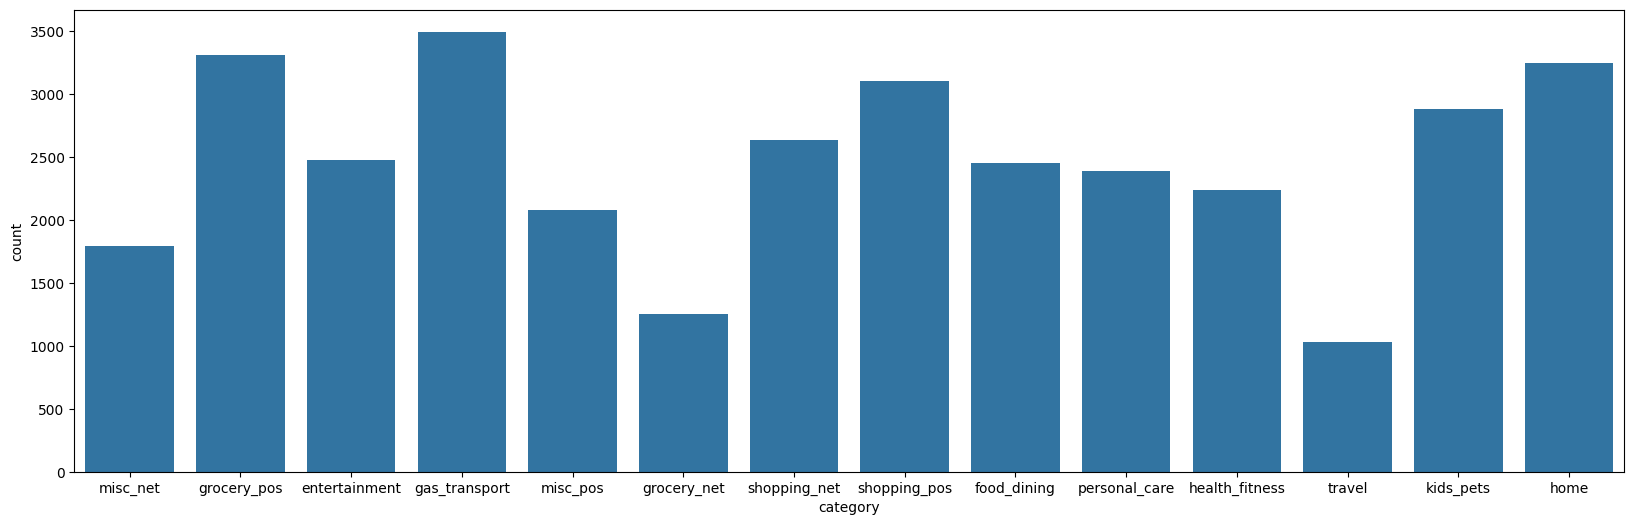

In [18]:
# Set the size of the figure
plt.figure(figsize=(20, 6))

# Plot the countplot
sns.countplot(x='category', data=df)

# Show the plot
plt.show()

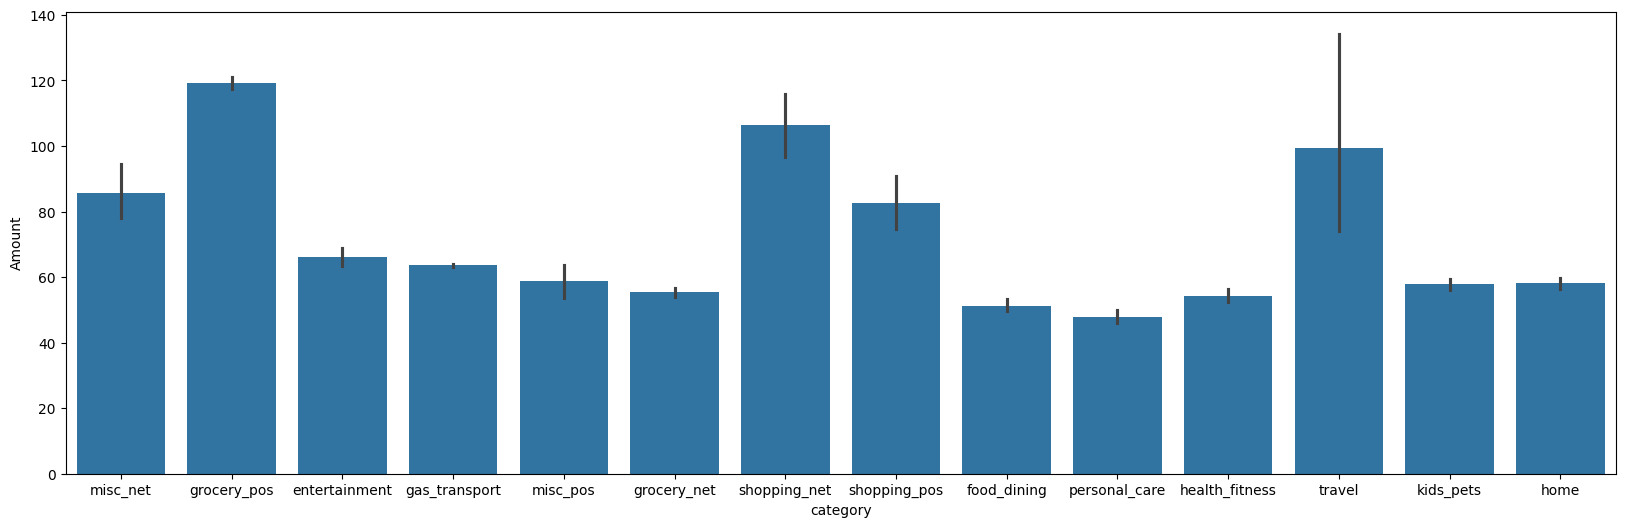

In [19]:
plt.figure(figsize=(20, 6))
sns.barplot(x='category', y='Amount', data=df)
plt.show()

In [20]:
df['is_fraud'].value_counts()

is_fraud
0.0    34002
1.0      351
Name: count, dtype: int64

<ipython-input-21-c2b74c7c4069>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], bins=50)


<Axes: xlabel='Time', ylabel='Density'>

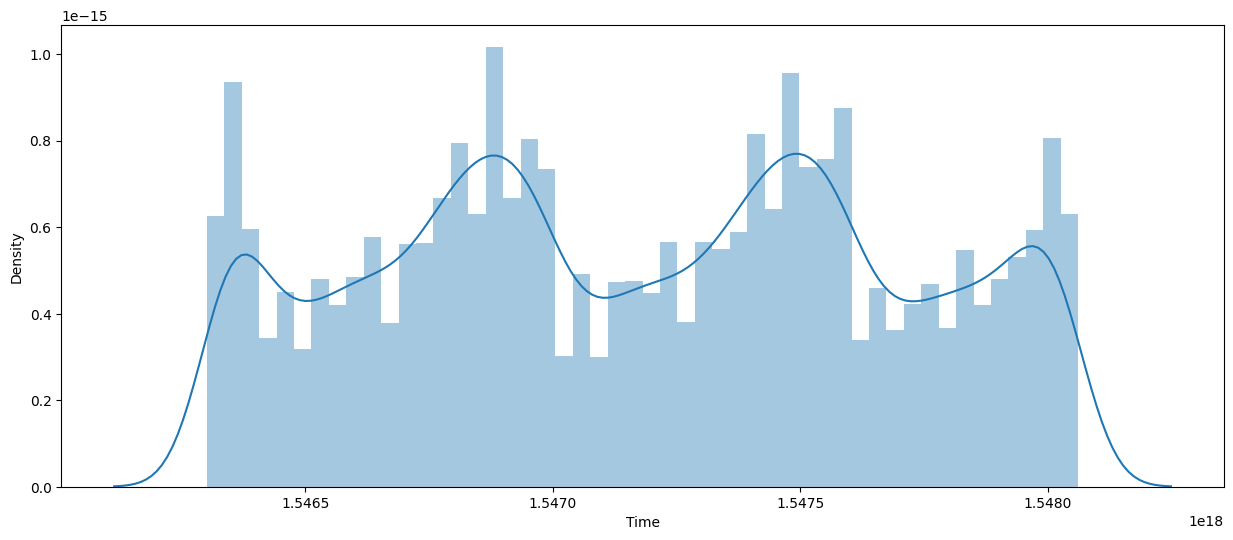

In [21]:
plt.figure(figsize=(15, 6))
sns.distplot(df['Time'], bins=50)

In [22]:
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])
df['merchant_encoded'] = label_encoder.fit_transform(df['merchant'])
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Hour'] = df['Time'].dt.hour
df.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,category_encoded,merchant_encoded,Amount_scaled,Hour
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,8,514,-0.459650,0
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,4,241,0.239682,0
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,0,390,1.011640,0
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,2,360,-0.185894,0
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,9,297,-0.206684,0


<ipython-input-23-1a5cdcf761f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hour'], bins=50)


<Axes: xlabel='Hour', ylabel='Density'>

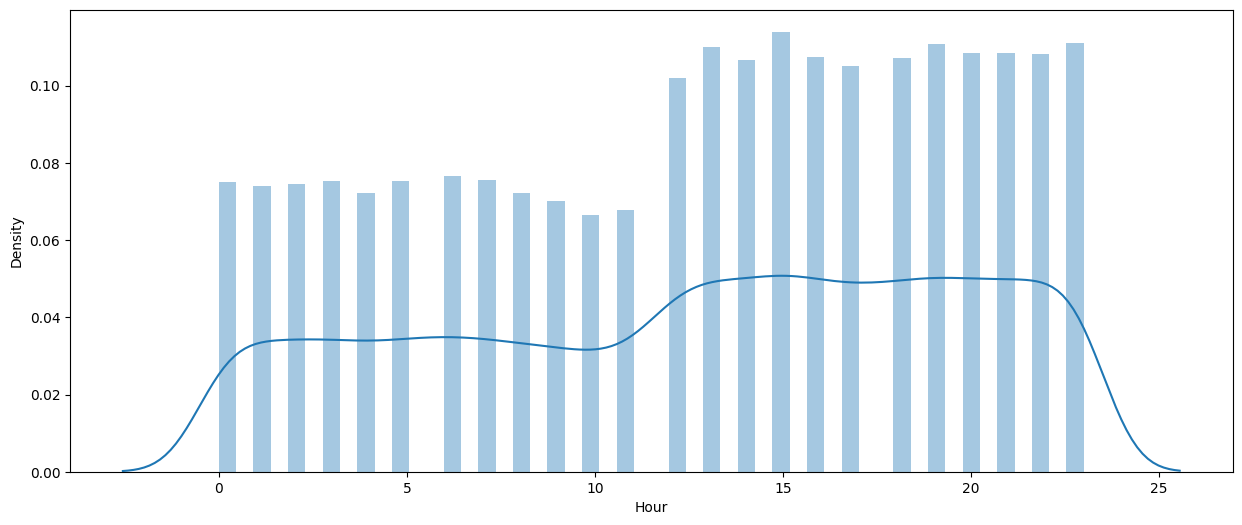

In [23]:
plt.figure(figsize=(15, 6))
sns.distplot(df['Hour'], bins=50)

In [24]:
df['Cardholder Name'] = df['firstName'] + ' ' + df['lastName']
# Calculate the average transaction amount for each cardholder
df['AverageAmountByCardholder'] = df.groupby('Cardholder Name')['Amount'].transform('mean')

# Calculate the difference between current transaction amount and average
df['AmountDiffFromAverage'] = df['Amount'] - df['AverageAmountByCardholder']

# Sort the DataFrame by 'Time' column in ascending order
df = df.sort_values('Time')

df.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,category_encoded,merchant_encoded,Amount_scaled,Hour,Cardholder Name,AverageAmountByCardholder,AmountDiffFromAverage
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,8,514,-0.459650,0,Jennifer Banks,67.586812,-62.616812
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,4,241,0.239682,0,Stephanie Gill,59.349490,47.880510
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,0,390,1.011640,0,Edward Sanchez,71.435385,148.674615
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,2,360,-0.185894,0,Jeremy White,40.431667,4.568333
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,9,297,-0.206684,0,Tyler Garcia,87.259667,-45.299667


In [25]:
df.drop(['ID', 'Card Number', 'trans_num',
         'firstName', 'lastName','merchant', 'Cardholder Name', 'trans_num', 'category'], axis=1, inplace=True)
df.head()

,Time,Amount,is_fraud,category_encoded,merchant_encoded,Amount_scaled,Hour,AverageAmountByCardholder,AmountDiffFromAverage
0,2019-01-01 00:00:00,4.97,0.0,8,514,-0.459650,0,67.586812,-62.616812
1,2019-01-01 00:00:00,107.23,0.0,4,241,0.239682,0,59.349490,47.880510
2,2019-01-01 00:00:00,220.11,0.0,0,390,1.011640,0,71.435385,148.674615
3,2019-01-01 00:01:00,45.00,0.0,2,360,-0.185894,0,40.431667,4.568333
4,2019-01-01 00:03:00,41.96,0.0,9,297,-0.206684,0,87.259667,-45.299667


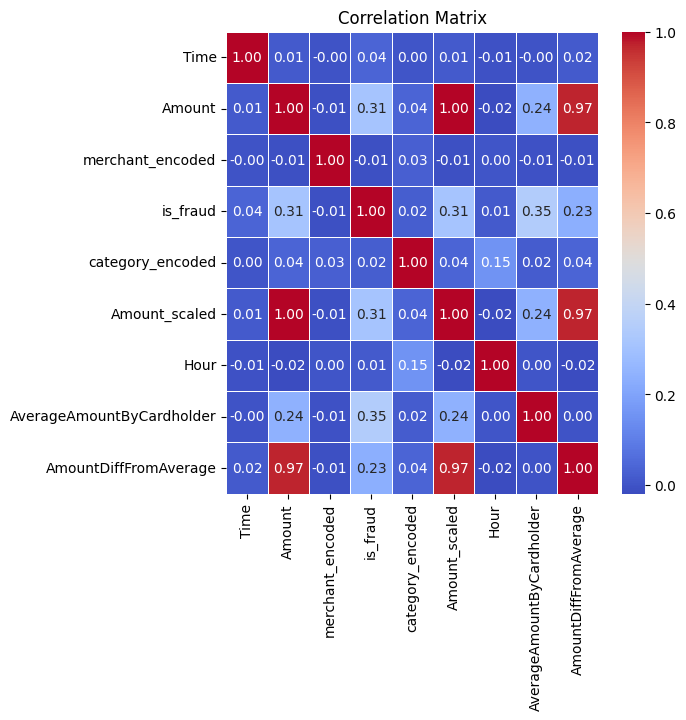

In [26]:
# Select the desired features
selected_features = ['Time', 'Amount','merchant_encoded', 'is_fraud', 'category_encoded', 'Amount_scaled', 'Hour', 'AverageAmountByCardholder', 'AmountDiffFromAverage']

# Create a subset DataFrame with the selected features
subset_df = df[selected_features]

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
X = df.drop(['is_fraud', 'Time'], axis=1)
y = df['is_fraud']

In [28]:
X.shape, y.shape

((34353, 7), (34353,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
models = [LogisticRegression(), SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,criterion='entropy', random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.9794386173464829
Validation Accuracy :  0.9842288440777008

SVC(probability=True) : 
Training Accuracy :  0.9745793524401848
Validation Accuracy :  0.9581868497365602

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) : 
Training Accuracy :  0.9999919242559817
Validation Accuracy :  0.9693628036939451



In [31]:
# Train your fraud detection model
# Replace this with your actual model training code
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9890355132932273
Precision: 0.55
Recall: 0.18803418803418803
F1-score: 0.2802547770700637
